# SIMULACIÓN | LABORATORIO 5


## Boostrap o remuestreo

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from IPython.display import display,Math
import ipywidgets as widgets
import random
import scipy.stats as stats
import statistics

### Ejercicio 1
Suponga que se ha registrado el tiempo que un conjunto de votantes ha permanecido en la cola antes de votar. Y que a partir de dichos datos, estamos interesados en calcular un intervalo de confianza para la mediana de dicho tiempo.
Para ello utilizaremos remuestreo o bootstrap.
1. Analice el código y evalue el número de muestras de bootstrap para alcanzar convergencia de la varianza estimada de la mediana.
2. Calcule el error cuadrático medio de la mediana.
3. Escoja otro estadístico de la muestra y calcule su incerteza con la técnica de boostrap

In [3]:
datos = [21,10,12,23,180,1,44,125,5,55,4,6,27,22,2,46,15,30,8,18]
n=20
m = statistics.median(datos)
print (m)
b=100
mm = 0
mn =[]
for i in range(b):
    dat = np.random.choice(list(datos),size=n,replace=True)
    mn.append(statistics.median(dat))
var = statistics.variance(mn)
print(var)
rango = 1.96*math.sqrt(var)
display(Math('%0.1f \pm %0.1f' % (m, rango)))

              

19.5
29.584747474747473


<IPython.core.display.Math object>

**Respuesta 1.1**

In [4]:
def convergencia(n,datos):
    b = [10,100,1000,10000,100000]
    mn =[]
    var = []
    for i in range (len(b)):
        for j in range(b[i]):
            dat = np.random.choice(list(datos),size=n,replace=True)
            mn.append(statistics.median(dat))
        var += [statistics.variance(mn)]
    return var

In [5]:
conv = convergencia(20,datos)


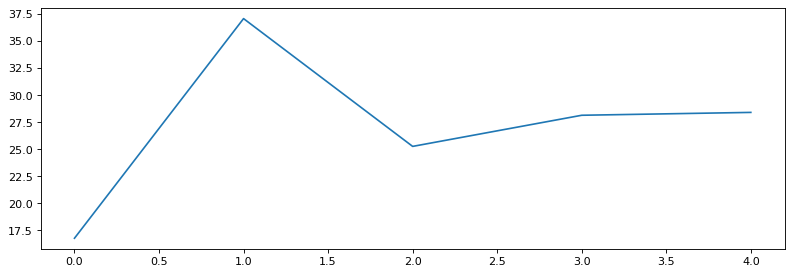

In [6]:
fig, ax = plt.subplots(1, 1,figsize=(12, 4), dpi=80)
ax.plot(conv)


De este grafico podemos ver claramente que el número de muestras de bootstrap para alcanzar convergencia de la varianza estimada de la mediana es aproximadamente 100000 

**Respuesta 1.2**

In [7]:
##error cuadrático
def suma(mn, n, b):
    s = 0
    for i in range(b):
        s+=((mn[i]-n)**2)
    return s

ec = (1/(b-1))*suma(mn, m, b)
ec

30.24747474747475

**Respuesta 1.3**

In [8]:
datos = [21,10,12,23,180,1,44,125,5,55,4,6,27,22,2,46,15,30,8,18]
n=20
m = statistics.mean(datos)
print (m)
b=100
mm = 0
mn =[]
for i in range(b):
    dat = np.random.choice(list(datos),size=n,replace=True)
    mn.append(statistics.mean(dat))
var = statistics.variance(mn)
print(var)
rango = 1.96*math.sqrt(var)
display(Math('%0.1f \pm %0.1f' % (m, rango)))


32.7
98


<IPython.core.display.Math object>

### Ejercicio 2

Suponga que los datos previamente registrados provienen de una distribución exponencial de tasa $\lambda$. 

1. Calcule el estimador máximo verosímil de $\lambda$
2. Utilice boostrap paramétrico para estimar la incerteza del parámetro estimado en (1). Estime el número de muestras para alcanzar convergencia.
3. Repita el ejercicio con el coeficiente de asimetría de la muestra.



**Respuesta 2.1**

In [86]:
loc0,lamb0 = scipy.stats.expon.fit(datos)

print("El estimador máximo verosimil de lambda es: ", lamb0)

El estimador máximo verosimil de lambda es:  31.700000000000003


**Respuesta 2.2**

In [87]:
b = 100
lamb =[]
for i in range(b):
    dat = np.random.choice(list(datos),size=n,replace=True)
    a, l = scipy.stats.expon.fit(dat)
    lamb.append(l)
varlamb = statistics.variance(lamb)
print(varlamb)
rango = (1/(b-1))*math.sqrt(varlamb)
display(Math('%0.1f \pm %0.1f' % (m, rango)))

110.96349974747476


<IPython.core.display.Math object>

In [88]:
def conv_lamb(n,datos):
    b = [10,100,1000,10000,100000]
    varlamb = []
    for i in range (len(b)):
        lamb =[]
        for j in range(b[i]):
            dat = np.random.choice(list(datos),size=n,replace=True)
            a, l = scipy.stats.expon.fit(dat)
            lamb.append(l)
        varlamb += [statistics.variance(lamb)]
    return varlamb

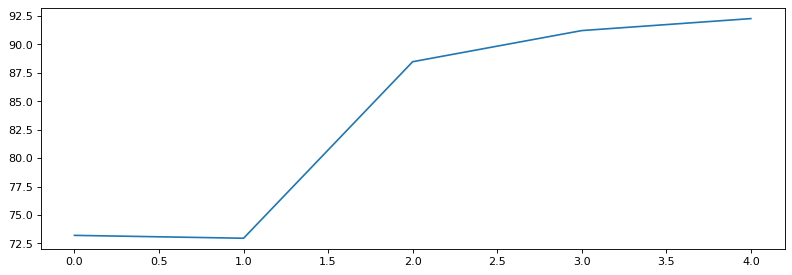

In [89]:
conv_l = conv_lamb(20, datos)

fig, ax = plt.subplots(1, 1,figsize=(12, 4), dpi=80)
ax.plot(conv_l)


El número de muestras necesarias para alcanzar la convergencia de la varianza en los valores de lambda es de alrededor de 10000

**Respuesta 2.3**

In [90]:
b = 100
sks =[]
for i in range(b):
    dat = np.random.choice(list(datos),size=n,replace=True)
    a, l = scipy.stats.expon.fit(dat)
    sks.append(scipy.stats.skew(dat))
varsks = statistics.variance(sks)
print(varsks)
rango = (1/(b-1))*math.sqrt(varsks)
display(Math('%0.1f \pm %0.1f' % (m, rango)))

0.4864192220876488


<IPython.core.display.Math object>

In [91]:
def conv_skew(n,datos):
    b = [10,100,1000,10000,100000]
    var_sk = []
    for i in range (len(b)):
        sks =[]
        for j in range(b[i]):
            dat = np.random.choice(list(datos),size=n,replace=True)
            sks.append(scipy.stats.skew(dat))
        var_sk.append(statistics.variance(sks))
    
    return var_sk

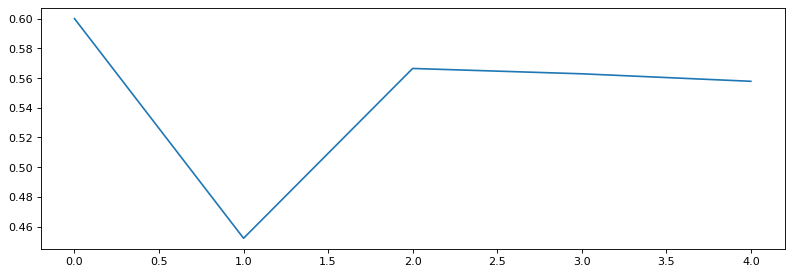

In [92]:
conv_s = conv_skew(20,datos)

fig, ax = plt.subplots(1, 1,figsize=(12, 4), dpi=80)
ax.plot(conv_s)


El número de muestras necesarias para la convergencia de la varianza de la asimetría es de 1000